<a href="https://colab.research.google.com/github/balaji-2k1/mnist_digit_classification/blob/main/CNN_dropout_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import mnist 

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


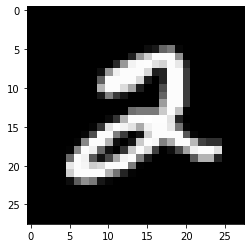

In [ ]:
plt.imshow(x_train[5],cmap='gray')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
print(y_train[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0         #Performed Normalization

WE Use Dropout Layer when there is Noisy Input Data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
# Creating two hidden layer neural Model
cnn_model=Sequential()
cnn_model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(rate=0.1)) #from 128 Neurons drop 12 neurons output randomly 
cnn_model.add(Conv2D(64,(3,3),activation='relu')) # No need to give input shape from second Layer
#Here data is still in form of arrays
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten()) #converting to 1d array so that compatible with the input for Dense Layer
#Dense Layer is must to get the output Data
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))#Output is a class of 10 digits

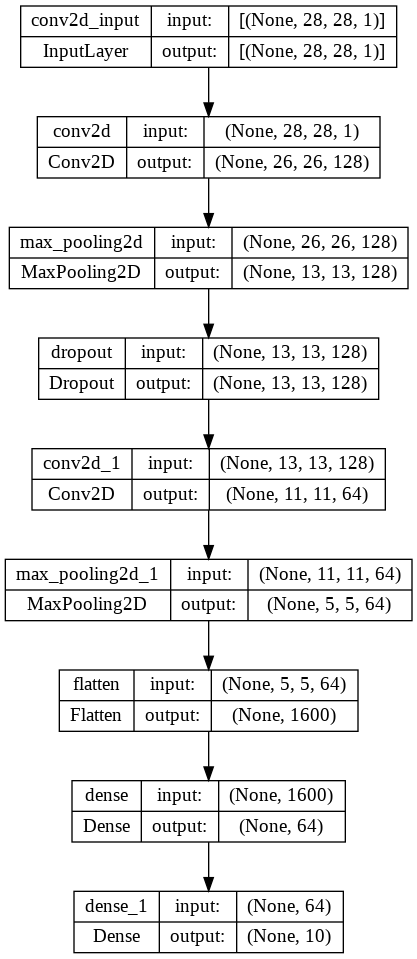

In [ ]:
keras.utils.plot_model(cnn_model,show_shapes=True)

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics='categorical_accuracy')

In [ ]:
#Early Stopping
call_here=tf.keras.callbacks.EarlyStopping(monitor='val_loss')
my_model=cnn_model.fit(x_train,y_train,
                       batch_size=54,
                       epochs=10,
                       validation_split=0.1,
                       callbacks=[call_here])

Epoch 1/10
1000/1000 [==============================] - 176s 174ms/step - loss: 0.1658 - categorical_accuracy: 0.9502 - val_loss: 0.0579 - val_categorical_accuracy: 0.9813
Epoch 2/10
1000/1000 [==============================] - 165s 165ms/step - loss: 0.0506 - categorical_accuracy: 0.9846 - val_loss: 0.0420 - val_categorical_accuracy: 0.9862


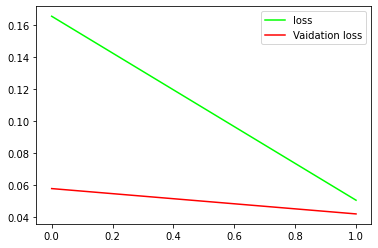

In [ ]:
plt.plot(my_model.history['loss'],color="#00ff00",label="loss")
plt.plot(my_model.history['val_loss'],color="#ff0000",label="Vaidation loss")
plt.legend() #adds axis label
plt.show()

In [ ]:
my_model.history

{'loss': [0.16576381027698517, 0.05060270056128502],
 'categorical_accuracy': [0.9502407312393188, 0.9846296310424805],
 'val_loss': [0.05787947028875351, 0.0420205295085907],
 'val_categorical_accuracy': [0.981333315372467, 0.9861666560173035]}

In [ ]:
cnn_model.save('project/')

In [ ]:
my_model=keras.models.load_model('project/')

In [ ]:
my_score=my_model.evaluate(x_test,y_test)
print("Test loss:", my_score[0])
print("Test accuracy:", my_score[1])

313/313 [==============================] - 8s 24ms/step - loss: 0.0376 - categorical_accuracy: 0.9882
Test loss: 0.03764918074011803
Test accuracy: 0.9882000088691711


In [ ]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve('http://joshmontague.com/images/mnist-2.png','img.jpg')
img=Image.open("/content/img.jpg")

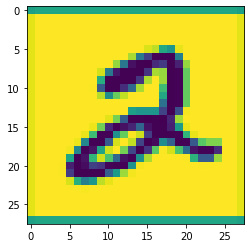

In [ ]:
img = keras.preprocessing.image.load_img('/content/img.jpg',color_mode = "grayscale", target_size=(28,28))
plt.imshow(img)

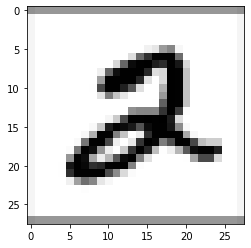

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img = keras.preprocessing.image.img_to_array(img)
img = img.reshape(1,28,28,1)
img=img.astype('float32')
img=img/255.0
result=my_model.predict(img)
print("The Image Digit Detected is ",np.argmax(result))
print("The Detected Image has ",int(np.max(result)*100),"% Accuracy")

1/1 [==============================] - 0s 118ms/step
The Image Digit Detected is  2
The Detected Image has  85 % Accuracy


A Good Accuracy than previous Model

1/1 [==============================] - 0s 64ms/step
The Image Digit Detected is  6
The Detected Image has  69 % Accuracy


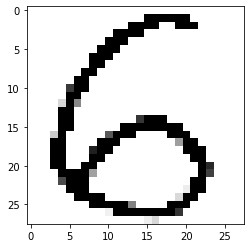

In [ ]:
urllib.request.urlretrieve('https://i.stack.imgur.com/CFjPz.png','img.jpg')
img=Image.open("/content/img.jpg")
img = keras.preprocessing.image.load_img('/content/img.jpg',color_mode = "grayscale", target_size=(28,28))
plt.imshow(img)
plt.imshow(img,cmap='gray')
img = keras.preprocessing.image.img_to_array(img)
img = img.reshape(1,28,28,1)
img=img.astype('float32')
img=img/255.0
result=my_model.predict(img)
print("The Image Digit Detected is ",np.argmax(result))
print("The Detected Image has ",int(np.max(result)*100),"% Accuracy")